In [15]:
#imports
from __future__ import print_function
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.nn.init as init
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from torch.autograd import Variable

In [16]:
epochs = 3 #학습 횟수
batch_size = 64 #??
test_batch_size = 1000
learning_rate = 0.01
momentum = 0.5
no_cuda = True
log_interval = 10

random_seed = 1

torch.manual_seed(random_seed)
use_cuda = not no_cuda and torch.cuda.is_available()


device = torch.device("cuda" if use_cuda else "cpu")

kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}

In [17]:
transform = transforms.Compose([
                 transforms.ToTensor(),
                 transforms.Normalize((0.1307,), (0.3081,))])

train_loader = torch.utils.data.DataLoader(
  datasets.MNIST('../data', train=True, download=True, 
                 transform=transform), 
    batch_size = batch_size, shuffle=True, **kwargs)

test_loader = torch.utils.data.DataLoader(
        datasets.MNIST('../data', train=False, download=True,
                 transform=transform), 
    batch_size=test_batch_size, shuffle=True, **kwargs)

In [18]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)

In [19]:
example_data.shape

torch.Size([1000, 1, 28, 28])

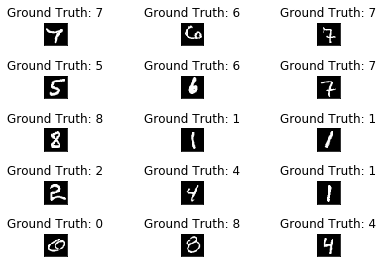

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Ground Truth: {}".format(example_targets[i]))
    plt.xticks([])
    plt.yticks([])

In [21]:
#model 생성

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 64)
        self.fc5 = nn.Linear(64, 32)
        self.fc6 = nn.Linear(32, 10)

    def forward(self, x):
        x = x.float()
        h1 = F.relu(self.fc1(x.view(-1, 784)))
        h2 = F.relu(self.fc2(h1))
        h3 = F.relu(self.fc3(h2))
        h4 = F.relu(self.fc4(h3))
        h5 = F.relu(self.fc5(h4))
        h6 = self.fc6(h5)
        return F.log_softmax(h6, dim=1)

In [22]:
#model 객체 선언

model = Net().to(device)

optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=momentum)

In [23]:
#train
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(epochs + 1)]

def train(epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            train_losses.append(loss.item())
            train_counter.append(
                (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))

In [24]:
def test():
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, size_average=False).item() 
            pred = output.argmax(dim=1, keepdim=True)
            correct += pred.eq(target.view_as(pred)).sum().item() 
            
    test_loss /= len(test_loader.dataset)
    test_losses.append(test_loss)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [25]:
test()
for epoch in range(1, epochs+1):
    train(epoch)
    test()

C:\Users\dorit\anaconda3\lib\site-packages\torch\nn\_reduction.py:43: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 2.3059, Accuracy: 892/10000 (9%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 2.317432
Train Epoch: 1 [640/60000 (1%)]	Loss: 2.292358
Train Epoch: 1 [1280/60000 (2%)]	Loss: 2.291344
Train Epoch: 1 [1920/60000 (3%)]	Loss: 2.323708
Train Epoch: 1 [2560/60000 (4%)]	Loss: 2.308107
Train Epoch: 1 [3200/60000 (5%)]	Loss: 2.297632
Train Epoch: 1 [3840/60000 (6%)]	Loss: 2.300074
Train Epoch: 1 [4480/60000 (7%)]	Loss: 2.291313
Train Epoch: 1 [5120/60000 (9%)]	Loss: 2.311059
Train Epoch: 1 [5760/60000 (10%)]	Loss: 2.284706
Train Epoch: 1 [6400/60000 (11%)]	Loss: 2.297875
Train Epoch: 1 [7040/60000 (12%)]	Loss: 2.301036
Train Epoch: 1 [7680/60000 (13%)]	Loss: 2.298134
Train Epoch: 1 [8320/60000 (14%)]	Loss: 2.299134
Train Epoch: 1 [8960/60000 (15%)]	Loss: 2.304302
Train Epoch: 1 [9600/60000 (16%)]	Loss: 2.291638
Train Epoch: 1 [10240/60000 (17%)]	Loss: 2.303455
Train Epoch: 1 [10880/60000 (18%)]	Loss: 2.295165
Train Epoch: 1 [11520/60000 (19%)]	Loss: 2.305285
Train Epoch: 1 [1216

Text(0, 0.5, 'negative log likelihood loss')

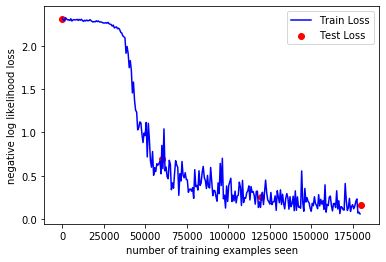

In [26]:
#plot
fig = plt.figure()
plt.plot(train_counter, train_losses, color='blue')
plt.scatter(test_counter, test_losses, color='red')
plt.legend(['Train Loss', 'Test Loss'], loc='upper right')
plt.xlabel('number of training examples seen')
plt.ylabel('negative log likelihood loss')

In [27]:
with torch.no_grad():
    output = model(example_data)

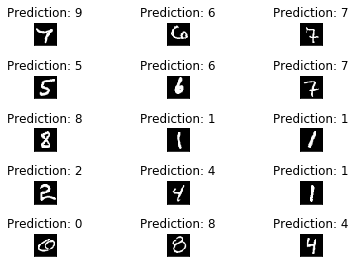

In [28]:
fig = plt.figure()
for i in range(15):
    plt.subplot(5,3,i+1)
    plt.tight_layout()
    plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
    plt.title("Prediction: {}".format(
        output.data.max(1, keepdim=True)[1][i].item()))
    plt.xticks([])
    plt.yticks([])